### Name : Shivani Shridhar Gole
### NUID : 002770631 

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The dataset used for this assignment is that of a binary classification problem i.e to detect a heart disease based on given features. Following are the features used :-

Sex: male or female(Nominal)
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral
• Current Smoker: whether or not the patient is a current smoker (Nominal)
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)
• Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
• Glucose: glucose level (Continuous)

The target feature is  10 year risk of coronary heart disease CHD - TenYearCHD

In [2]:
heart_disease = pd.read_csv("framingham.csv")

In [3]:
heart_disease.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Exploratory Data Analysis

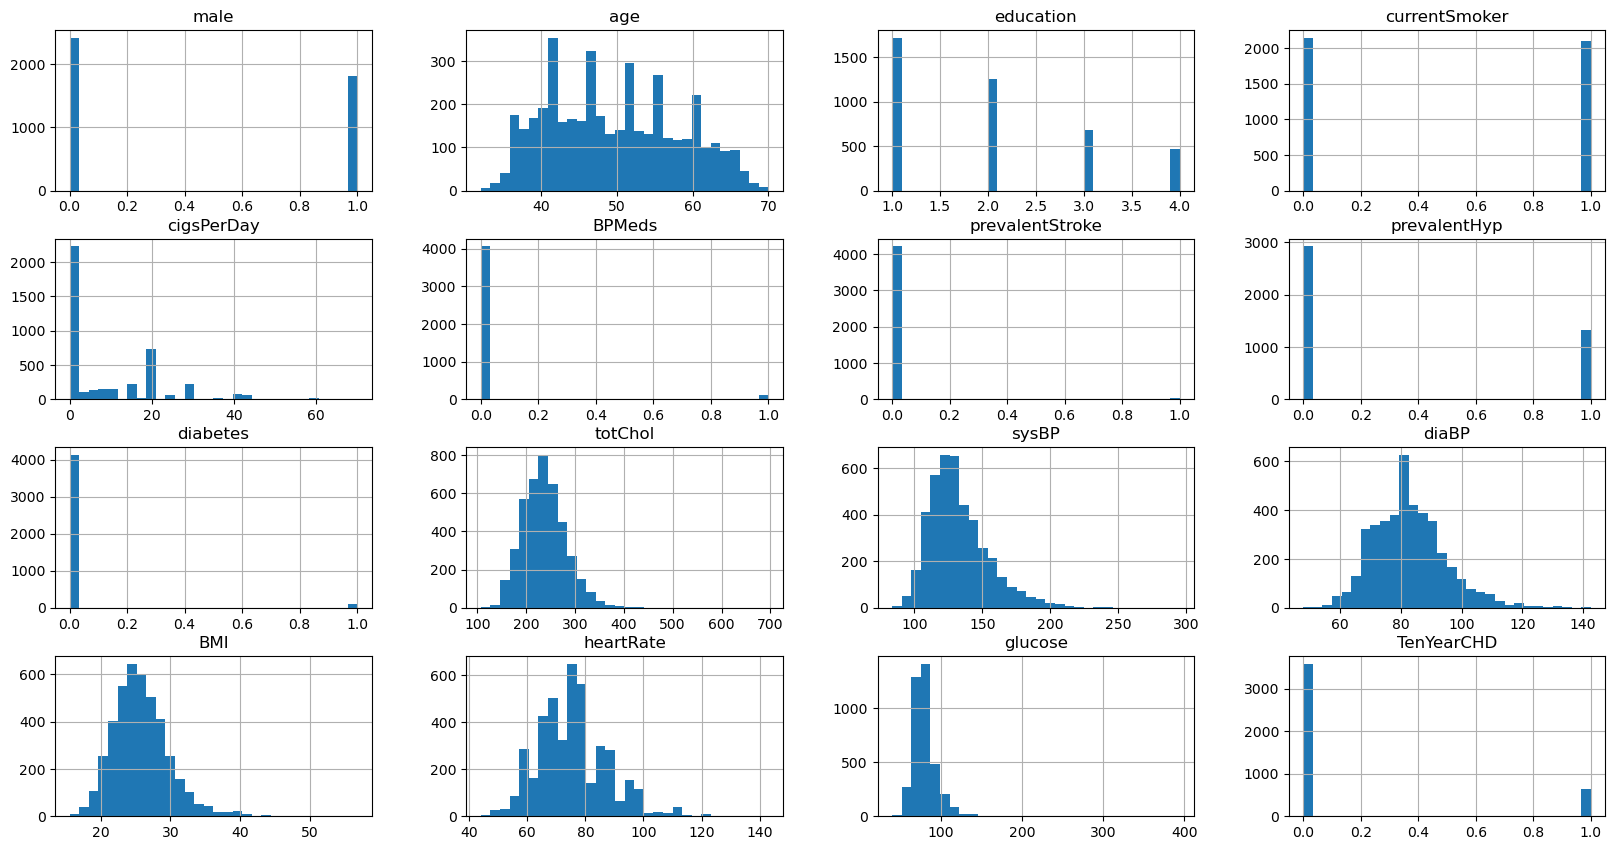

In [4]:
heart_disease.hist(bins=30, 
        figsize=(20,40),
        layout=(15,4));

In [5]:
heart_disease.shape

(4238, 16)

In [6]:
heart_disease = heart_disease.dropna()  # Drop rows with null values

In [7]:
heart_disease = heart_disease.drop_duplicates()

In [8]:
X = heart_disease.drop('TenYearCHD', axis=1).values
y = heart_disease['TenYearCHD'].values

In [9]:
X

array([[  1.  ,  39.  ,   4.  , ...,  26.97,  80.  ,  77.  ],
       [  0.  ,  46.  ,   2.  , ...,  28.73,  95.  ,  76.  ],
       [  1.  ,  48.  ,   1.  , ...,  25.34,  75.  ,  70.  ],
       ...,
       [  1.  ,  50.  ,   1.  , ...,  25.97,  66.  ,  86.  ],
       [  1.  ,  51.  ,   3.  , ...,  19.71,  65.  ,  68.  ],
       [  0.  ,  52.  ,   2.  , ...,  21.47,  80.  , 107.  ]])

In [10]:
# Perform scaling (standardization)
def scale_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std
    return X_scaled

In [11]:
X_scaled = scale_features(X)

In [12]:
X_scaled

array([[ 1.11982472, -1.23335117,  1.97575158, ...,  0.29168785,
         0.35633992, -0.20312694],
       [-0.8929969 , -0.41559058,  0.01979497, ...,  0.7246142 ,
         1.60828949, -0.24495595],
       [ 1.11982472, -0.1819447 , -0.95818334, ..., -0.10926099,
        -0.06097661, -0.49592996],
       ...,
       [ 1.11982472,  0.05170118, -0.95818334, ...,  0.04570696,
        -0.81214636,  0.17333408],
       [ 1.11982472,  0.16852412,  0.99777327, ..., -1.49413337,
        -0.89560966, -0.57958797],
       [-0.8929969 ,  0.28534706,  0.01979497, ..., -1.06120701,
         0.35633992,  1.05174313]])

In [13]:
#Train Test Split
def train_test_split(X, y, test_size=0.2, random_seed=42):
    np.random.seed(random_seed)
    num_samples = X.shape[0]
    num_test_samples = int(test_size * num_samples)
    indices = np.random.permutation(num_samples)
    X_train = X[indices[num_test_samples:]]
    y_train = y[indices[num_test_samples:]]
    X_test = X[indices[:num_test_samples]]
    y_test = y[indices[:num_test_samples]]
    return X_train, X_test, y_train, y_test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)


In [15]:
# Logistic Regression using a single neuron neural network with SGD
class LogisticRegression:
    def __init__(self, input_size, activation_function, learning_rate=0.01):
        self.weights = np.random.randn(input_size)
        self.bias = 0
        self.learning_rate = learning_rate
        self.activation_function = activation_function
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def tanh(self, z):
        return np.tanh(z)
    
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        if self.activation_function == 'sigmoid':
            return self.sigmoid(z)
        elif self.activation_function == 'relu':
            return self.relu(z)
        elif self.activation_function == 'tanh':
            return self.tanh(z)
        else:
            raise ValueError("Invalid activation function")
    
    def log_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def stochastic_gradient_descent(self, X, y_true, y_pred):
        gradient_weights = np.dot(X.T, y_pred - y_true) / X.shape[0]
        gradient_bias = np.mean(y_pred - y_true)
        self.weights -= self.learning_rate * gradient_weights
        self.bias -= self.learning_rate * gradient_bias
    
    def train(self, X, y, num_epochs=100):
        losses = []
        for epoch in range(num_epochs):
            y_pred = self.predict(X)
            loss = self.log_loss(y, y_pred)
            losses.append(loss)
            self.stochastic_gradient_descent(X, y, y_pred)
        return losses



Calculating Metrics and comparisions

In [16]:
def calculate_metrics(y_true, y_pred):
    y_pred_class = (y_pred >= 0.5).astype(int)
    true_positives = np.sum(y_true * y_pred_class)
    false_positives = np.sum((1 - y_true) * y_pred_class)
    false_negatives = np.sum(y_true * (1 - y_pred_class))
    
    accuracy = (true_positives + np.sum(1 - y_true)) / len(y_true)
    precision = true_positives / (true_positives + false_positives + 1e-15)
    recall = true_positives / (true_positives + false_negatives + 1e-15)
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-15)
    
    return accuracy, f1_score

In [17]:
sigmoid_model = LogisticRegression(input_size=X_train.shape[1], activation_function='sigmoid', learning_rate=0.1)
sigmoid_losses = sigmoid_model.train(X_train, y_train, num_epochs=500)
sigmoid_y_pred_test = sigmoid_model.predict(X_test)
sigmoid_test_loss = sigmoid_model.log_loss(y_test, sigmoid_y_pred_test)
sigmoid_accuracy, sigmoid_f1_score = calculate_metrics(y_test, sigmoid_y_pred_test)

In [18]:
tanh_model = LogisticRegression(input_size=X_train.shape[1], activation_function='tanh', learning_rate=0.1)
tanh_losses = tanh_model.train(X_train, y_train, num_epochs=500)
tanh_y_pred_test = tanh_model.predict(X_test)
tanh_test_loss = tanh_model.log_loss(y_test, tanh_y_pred_test)
tanh_accuracy, tanh_f1_score = calculate_metrics(y_test, tanh_y_pred_test)

In [19]:
relu_model = LogisticRegression(input_size=X_train.shape[1], activation_function='relu', learning_rate=0.1)
relu_losses = relu_model.train(X_train, y_train, num_epochs=500)
relu_y_pred_test = relu_model.predict(X_test)
relu_test_loss = relu_model.log_loss(y_test, relu_y_pred_test)
relu_accuracy, relu_f1_score = calculate_metrics(y_test, relu_y_pred_test)

All accuracies are that of testing

In [20]:
print("Sigmoid Activation:")
print(f"Test Loss: {sigmoid_test_loss:.4f}")
print(f"Accuracy: {sigmoid_accuracy:.4f}")
print(f"F1 Score: {sigmoid_f1_score:.4f}")


Sigmoid Activation:
Test Loss: 0.4196
Accuracy: 0.8482
F1 Score: 0.1538


In [21]:
print("\nReLU Activation:")
print(f"Test Loss: {relu_test_loss:.4f}")
print(f"Accuracy: {relu_accuracy:.4f}")
print(f"F1 Score: {relu_f1_score:.4f}")


ReLU Activation:
Test Loss: 0.6381
Accuracy: 0.8399
F1 Score: 0.0781


In [22]:
print("\nTanh Activation:")
print(f"Test Loss: {tanh_test_loss:.4f}")
print(f"Accuracy: {tanh_accuracy:.4f}")
print(f"F1 Score: {tanh_f1_score:.4f}")



Tanh Activation:
Test Loss: 0.6296
Accuracy: 0.8372
F1 Score: 0.0480


Hence in comparision,
Accuracy: Sigmoid>ReLu>Tanh
F1 Score: Sigmoid>ReLu>Tanh

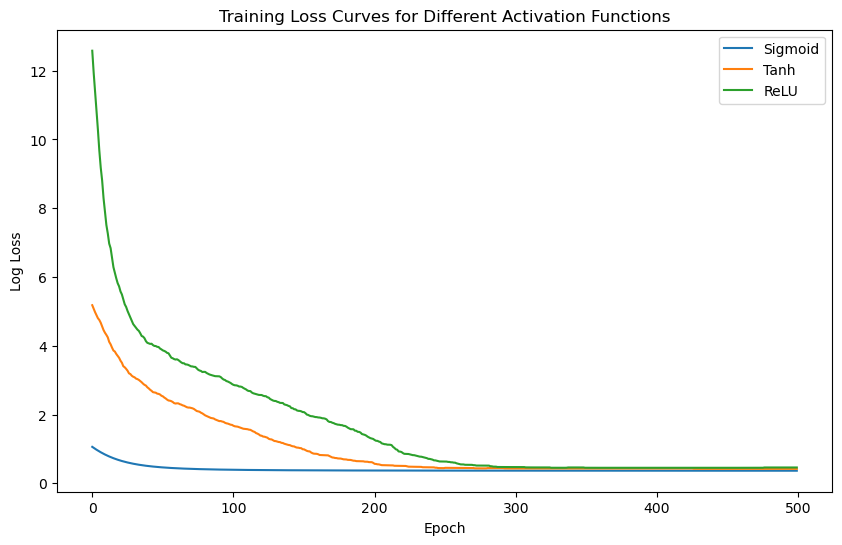

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(sigmoid_losses, label='Sigmoid')
plt.plot(tanh_losses, label='Tanh')
plt.plot(relu_losses, label='ReLU')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Training Loss Curves for Different Activation Functions')
plt.legend()
plt.show()

In [24]:
def calculate_confusion_matrix(y_true, y_pred):
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    return np.array([[tn, fp], [fn, tp]])

In [25]:
def calculate_roc_curve(y_true, y_pred):
    thresholds = np.unique(y_pred)
    tpr_values = []
    fpr_values = []
    
    for threshold in thresholds:
        y_pred_binary = (y_pred >= threshold).astype(int)
        tn, fp, fn, tp = calculate_confusion_matrix(y_true, y_pred_binary).ravel()
        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tpr_values.append(tpr)
        fpr_values.append(fpr)
    
    return np.array(fpr_values), np.array(tpr_values)

In [26]:
def plot_confusion_matrix(conf_matrix, title):
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    classes = ['Negative', 'Positive']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [27]:
def plot_roc_curve(fpr, tpr, title):
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()


In [28]:
sigmoid_conf_matrix = calculate_confusion_matrix(y_test, sigmoid_y_pred_test >= 0.5)
tanh_conf_matrix = calculate_confusion_matrix(y_test, tanh_y_pred_test >= 0.5)
relu_conf_matrix = calculate_confusion_matrix(y_test, relu_y_pred_test >= 0.5)



In [29]:
fpr_sigmoid, tpr_sigmoid = calculate_roc_curve(y_test, sigmoid_y_pred_test)
fpr_tanh, tpr_tanh = calculate_roc_curve(y_test, tanh_y_pred_test)
fpr_relu, tpr_relu = calculate_roc_curve(y_test, relu_y_pred_test)

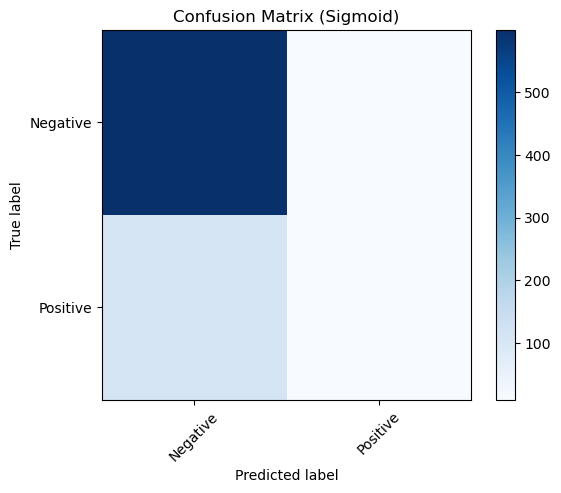

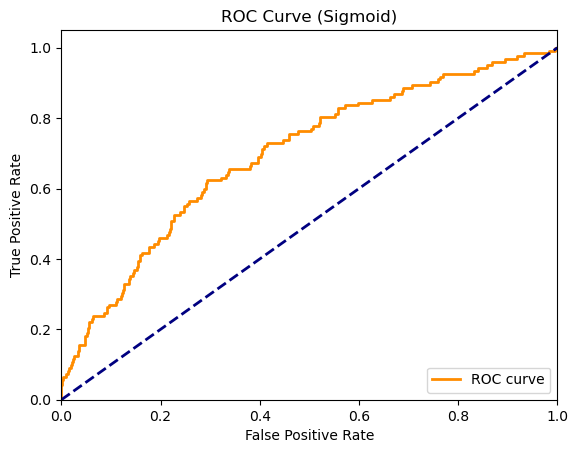

In [30]:
plot_confusion_matrix(sigmoid_conf_matrix, title='Confusion Matrix (Sigmoid)')
plot_roc_curve(fpr_sigmoid, tpr_sigmoid, title='ROC Curve (Sigmoid)')

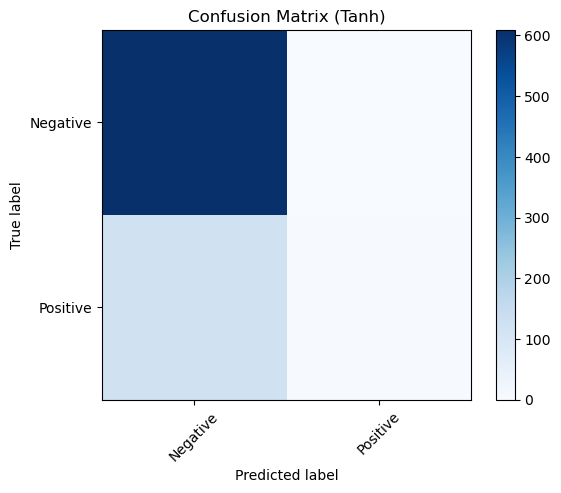

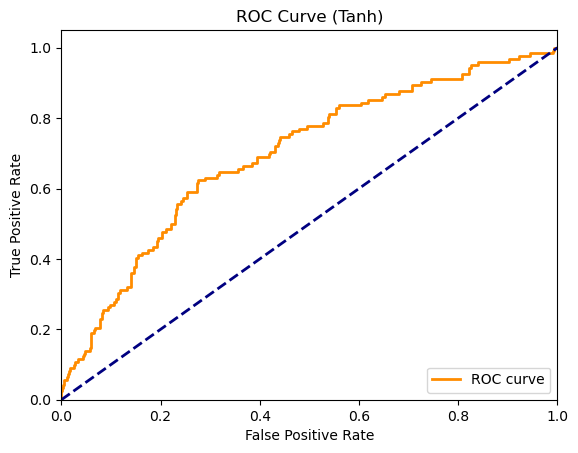

In [31]:
plot_confusion_matrix(tanh_conf_matrix, title='Confusion Matrix (Tanh)')
plot_roc_curve(fpr_tanh, tpr_tanh, title='ROC Curve (Tanh)')

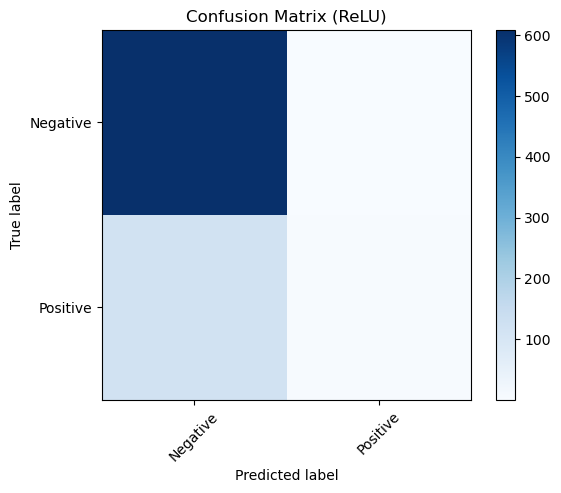

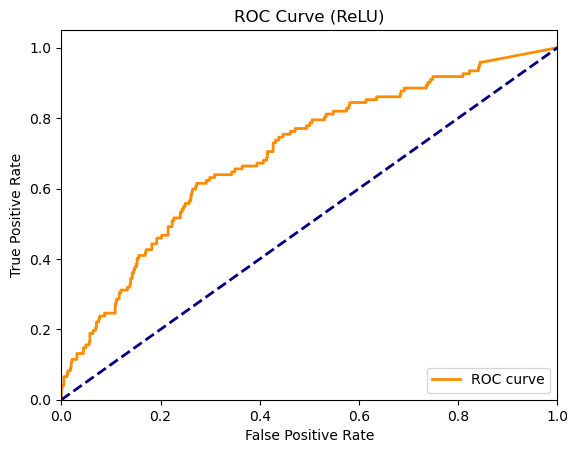

In [32]:
plot_confusion_matrix(relu_conf_matrix, title='Confusion Matrix (ReLU)')
plot_roc_curve(fpr_relu, tpr_relu, title='ROC Curve (ReLU)')